In [18]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import pandas as pd
plt.rcParams['figure.figsize'] = (15, 4)

retrieve the audio

In [19]:
x, sr = librosa.load('audio/good/GOT_mono_l.wav')
print('sample rate is: ',sr) #print sample rate
print('lenght of audio in frames: ',len(x))
print('length of audio in second: ', len(x) / float(sr))

('sample rate is: ', 22050)
('lenght of audio in frames: ', 639960)
('length of audio in second: ', 29.02312925170068)


play the audio

In [20]:
ipd.Audio(x, rate=sr)

display the audio signal

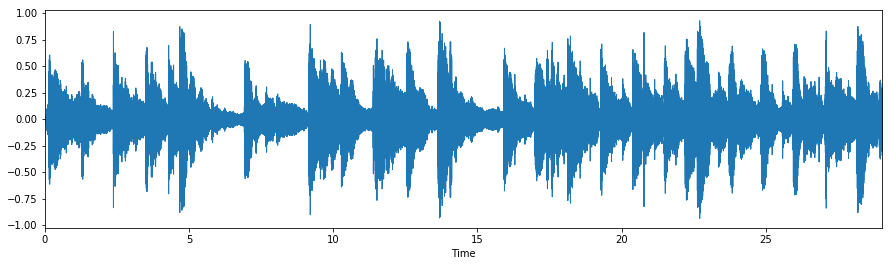

In [21]:
librosa.display.waveplot(x, sr=sr)

Compute the short-time Fourier transform:

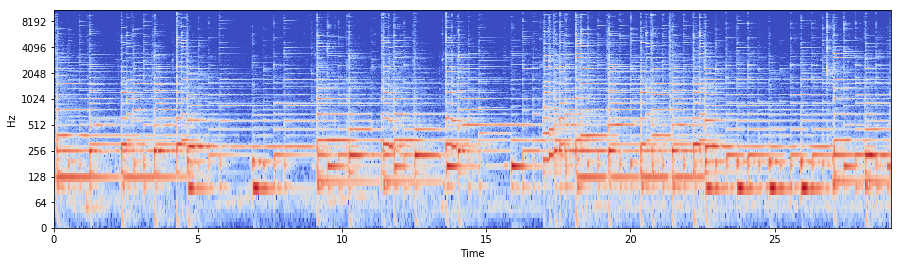

In [22]:
X = librosa.stft(x)
Xmag = librosa.amplitude_to_db(librosa.magphase(X)[0]) #For display purposes, compute the log amplitude of the STFT

# Play with the parameters, including x_axis and y_axis
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log') #Display the spectrogram.

# Step 2: Detect Onsets

In [23]:
#Find the times, in seconds, when onsets occur in the audio signal.
onset_frames = librosa.onset.onset_detect(x, sr=sr, backtrack=True)
print onset_frames[:10]  #these not frame numbers, these are frame indices
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print onset_times[:10]

[  2   6  22  37  54 101 108 119 134 151]
[0.04643991 0.13931973 0.510839   0.85913832 1.25387755 2.34521542
 2.5077551  2.7631746  3.11147392 3.50621315]


view detected onsets times and actual onset times using a pandas dataframe

In [24]:
df = pd.read_csv('audio/RM-C027.txt', header=None)
df.columns = ['actual']
df['detected'] = pd.Series(onset_times)
df.head()

actual  detected
0  0.04327  0.046440
1  0.64908  0.139320
2  1.24326  0.510839
3  1.85238  0.859138
4  2.44644  1.253878

In [25]:
# Convert the onset frames into sample indices (දර්ශක)
onset_samples = librosa.frames_to_samples(onset_frames) #by this we get correct frame numbers related to onsets
print onset_samples[:10]

[ 1024  3072 11264 18944 27648 51712 55296 60928 68608 77312]


Play a "beep" at each onset.

In [34]:
# Use the `length` parameter so the click track is the same length as the original signal# Use the `length` parameter 
clicks = librosa.clicks(times=onset_times, length=len(x))
ipd.Audio(x+clicks, rate=sr) # Play the click track "added to" the original signal
clicks
print(str(len(clicks)) + "length of samples :"+ str(len(x)))

639960length of samples :639960


# Step 3: Segment the Audio

Save into an array, segments, 100-ms segments beginning at each onset.

In [27]:
frame_sz = int(0.100*sr)
segments = numpy.array([x[i:i+frame_sz] for i in onset_samples])

Here is a function that adds 300 ms of silence onto the end of each segment and concatenates them into one signal. Later, we will use this function to listen to each segment, perhaps sorted in a different order.

In [28]:
def concatenate_segments(segments, sr=22050, pad_time=0.300):
    padded_segments = [numpy.concatenate([segment, numpy.zeros(int(pad_time*sr))]) for segment in segments]
    return numpy.concatenate(padded_segments)

In [29]:
concatenated_signal = concatenate_segments(segments, sr)

Listen to the newly concatenated signal.

In [30]:
ipd.Audio(concatenated_signal, rate=sr)